<a href="https://colab.research.google.com/github/shivavsrivastava/Algorithms/blob/main/Course4_W2_TravelingSalesmanProblem_NP_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traveling Salesman Problem (TSP)

Use dynamic programming to solve the TSP problem in O(N^2 2^N) rather than brute force running time of O(N!)![TSP1.png](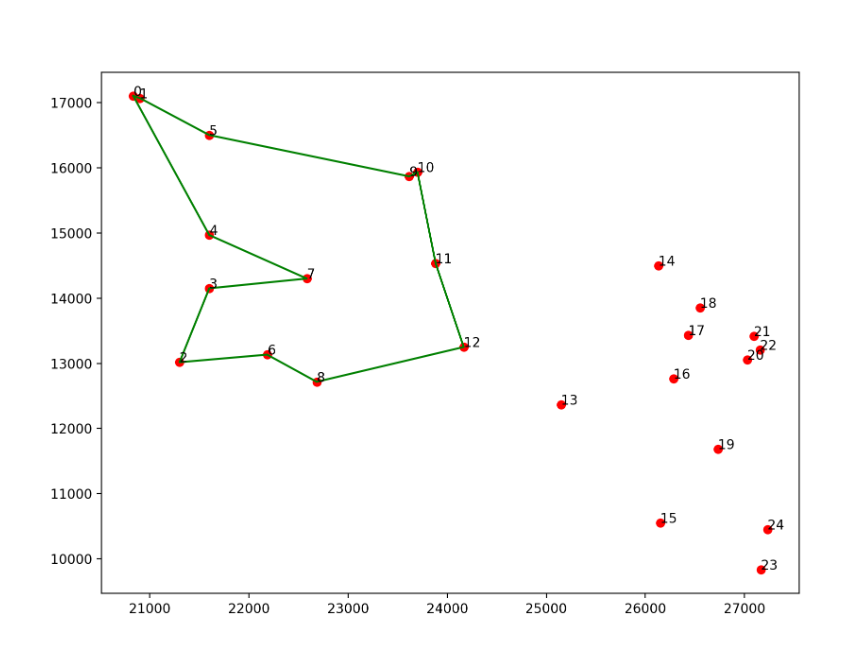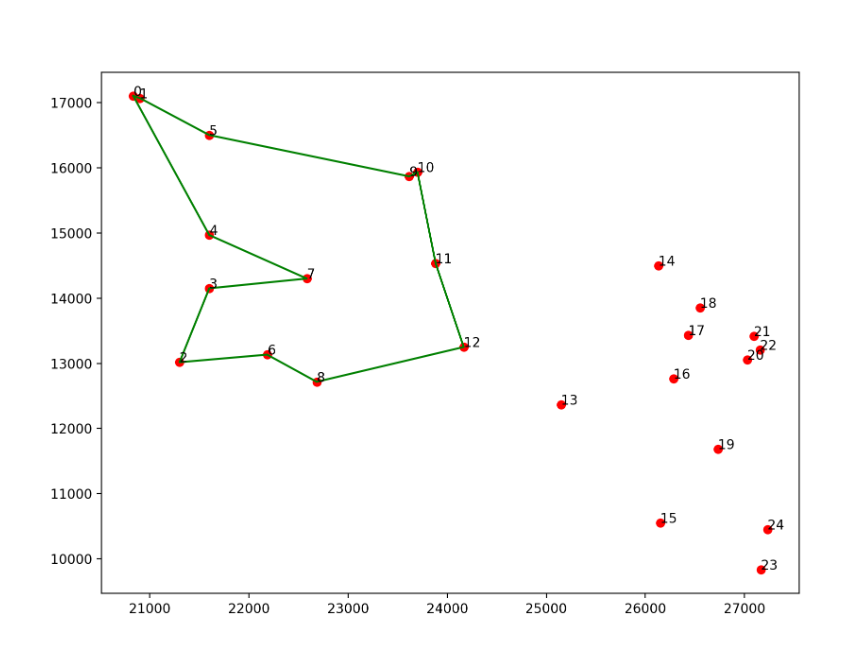)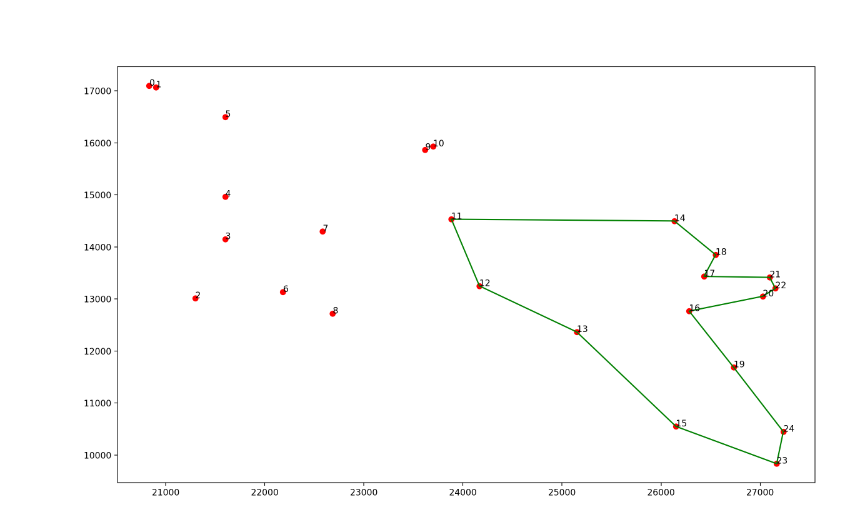



In [1]:
import numpy as np
import random
import urllib3
import math
import time
import copy
import sys
from itertools import combinations, permutations


import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def TravelingSalesmanProblem_dynamic(G, A, combination_path, nodes_no_start, start_vert):
    row, col = A.shape
    for r in range(row):
        if len(combination_path[r]) == 1:
            for c in range(col):
                if nodes_no_start[c] in combination_path[r]:
                    if G.has_edge(start_vert, nodes_no_start[c]):
                        A[r][c] = G.edges[start_vert, nodes_no_start[c]]['weight'] # dist from start vertex considered for smaller combinations
        else:
            for dest in combination_path[r]:
                #print("A : \n{}".format(A))
                dest_idx = nodes_no_start.index(dest)
                nodes_no_dest = copy.deepcopy(combination_path[r])
                nodes_no_dest.remove(dest)
                r_prev_idx = combination_path.index(nodes_no_dest)
                #print("nodes_no_dest: {}, dest: {}".format(nodes_no_dest, dest))
                start_min_path = None
                min_last_path = None
                minimum_list = []
                for middle_path_node in nodes_no_dest:  # depends on entire row of substring without start and destination
                    c_mid_idx = nodes_no_start.index(middle_path_node)
                    if G.has_edge(middle_path_node, dest):
                        #if G.edges[middle_path_node, dest]['weight']  < min_last_path:
                            min_last_path = G.edges[middle_path_node, dest]['weight']
                            start_min_path = A[r_prev_idx][c_mid_idx]
                            minimum_list.append(start_min_path + min_last_path)
                if len(minimum_list) > 0:
                    A[r][dest_idx] = min(minimum_list)

In [3]:
def TravelingSalesmanProblem(graph, start_vert):
    nodes = list(graph.nodes)
    nodes_no_start = copy.deepcopy(nodes)
    nodes_no_start.remove(start_vert)
    combination_path = []
    for length in range(len(nodes_no_start)):
        comb = combinations(nodes_no_start, length+1)
        for co in list(comb):
            combination_path.append(list(co))
    A = np.full((len(combination_path), len(nodes_no_start)), float('inf'))
    TravelingSalesmanProblem_dynamic(graph, A, combination_path, nodes_no_start, start_vert)
    print("A : \n{}".format(A))
    shortest_paths = A[-1]
    min_tsp = float('inf')
    for idx in range(len(shortest_paths)):
        c_val = nodes_no_start[idx]
        if graph.has_edge(c_val, start_vert) and shortest_paths[idx] != float('inf'):
            x = graph.edges[c_val, start_vert]['weight'] + shortest_paths[idx]
            if x < min_tsp:
                min_tsp = x
    print("Shortest Traveling Salesman Problem solution for node {}: {}".format(start_vert, min_tsp))
    return min_tsp

Tests : small graphs

A : 
[[ 1. inf inf inf]
 [inf  4. inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf  3. inf]
 [inf inf inf inf]
 [inf inf  7. inf]
 [inf inf inf 10.]
 [inf inf inf inf]
 [ 9.  6. inf inf]
 [inf inf inf inf]
 [inf inf inf  8.]
 [inf inf 15. 12.]
 [17. 14. inf 12.]]
Shortest Traveling Salesman Problem solution for node a: 18.0


18.0

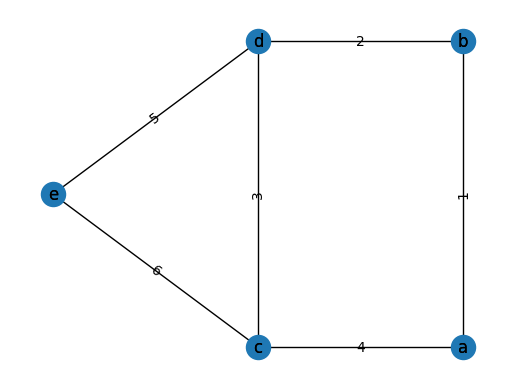

In [4]:
G = nx.Graph()
for i,j in zip(['a', 'b', 'c', 'd', 'e'],[(5, 5), (5, 10), (0, 5), (0, 10), (-5, 7.5)]):
    G.add_node(i, pos=j)
G.add_weighted_edges_from([('a', 'b', 1), ('b', 'd', 2), ('d', 'c', 3), ('c', 'a', 4), ('d', 'e', 5), ('c', 'e', 6)])
pos = nx.get_node_attributes(G, 'pos')
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw_networkx_labels(G,pos=pos)
nx.draw(G, pos, with_labels = True)
TravelingSalesmanProblem(G, 'a')

A : 
[[  1.  inf  inf  inf  inf  inf]
 [ inf   1.  inf  inf  inf  inf]
 [ inf  inf   1.  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [  2.   2.  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf   2.  inf]
 [ inf  inf  inf  inf  inf   2.]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf 101.]
 [ inf  inf  inf   2.  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf   3.  inf]
 [102. 102.  inf  inf  inf   3.]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf   3.  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ in

106.0

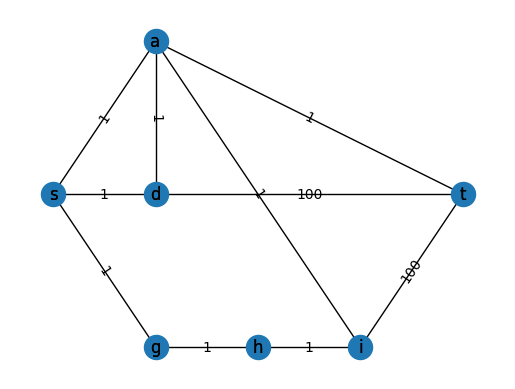

In [5]:
G = nx.Graph()
for i,j in zip(['s', 'a', 'd', 'g', 'h', 'i', 't'],[(0, 5), (5, 10), (5, 5), (5, 0), (10, 0), (15, 0), (20, 5)]):
    G.add_node(i, pos=j)
G.add_weighted_edges_from([('s', 'a', 1), ('s', 'd', 1), ('s', 'g', 1), ('a', 't', 1), ('d', 't', 100), ('g', 'h', 1), ('h', 'i', 1), ('i', 't', 100), ('i', 'a', 1), ('d', 'a', 1)])
pos = nx.get_node_attributes(G, 'pos')
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw_networkx_labels(G,pos=pos)
nx.draw(G, pos, with_labels = True)
TravelingSalesmanProblem(G, 's')

## Programming Assignment



In this assignment you will implement one or more algorithms for the traveling salesman problem, such as the dynamic programming algorithm covered in the video lectures. Here is a data file describing a TSP instance: **tsp.txt**

The first line indicates the number of cities. Each city is a point in the plane, and each subsequent line indicates the x- and y-coordinates of a single city.

The distance between two cities is defined as the Euclidean distance --- that is, two cities at locations
 and
 have distance
 between them.

In the box below, type in the minimum cost of a traveling salesman tour for this instance, rounded down to the nearest integer.

OPTIONAL: If you want bigger data sets to play with, check out the TSP instances from around the world here. The smallest data set (Western Sahara) has 29 cities, and most of the data sets are much bigger than that. What's the largest of these data sets that you're able to solve --- using dynamic programming or, if you like, a completely different method?

HINT: You might experiment with ways to reduce the data set size. For example, trying plotting the points. Can you infer any structure of the optimal solution? Can you use that structure to speed up your algorithm?

In [6]:
def testcase_tsp(url):
    challenge_graph = nx.Graph()
    http = urllib3.PoolManager()
    r1 = http.request('GET', url)
    IntegerMatrixStringJoin = r1.data.decode('utf8').split('\n')
    IntegerMatrixStringJoin.remove('')
    # tsp.txt first line is number of nodes: 25
    IntegerMatrixStringJoin.remove(IntegerMatrixStringJoin[0])
    coords_cities = []
    edges = []
    for i in IntegerMatrixStringJoin:
        node_coord = i.split(' ')
        x = float(node_coord[0])
        y = float(node_coord[1])
        coords_cities.append([x, y])
    for c1 in range(len(coords_cities)-1):
        for c2 in range(c1+1, len(coords_cities)):
            euclidean_distance = ((coords_cities[c1][0]-coords_cities[c2][0])**2 + (coords_cities[c1][1]-coords_cities[c2][1])**2)**0.5
            if (c1 == 11 and c2 == 12) or  (c1 == 12 and c2 == 11) :
                euclidean_distance_Edge_11_12 = euclidean_distance
            edges.append((c1, c2, euclidean_distance))
    challenge_graph.add_weighted_edges_from(edges)
    for i in range(len(coords_cities)):
        challenge_graph.nodes[i]['pos'] = (coords_cities[i][0], coords_cities[i][1])
    return challenge_graph, euclidean_distance_Edge_11_12



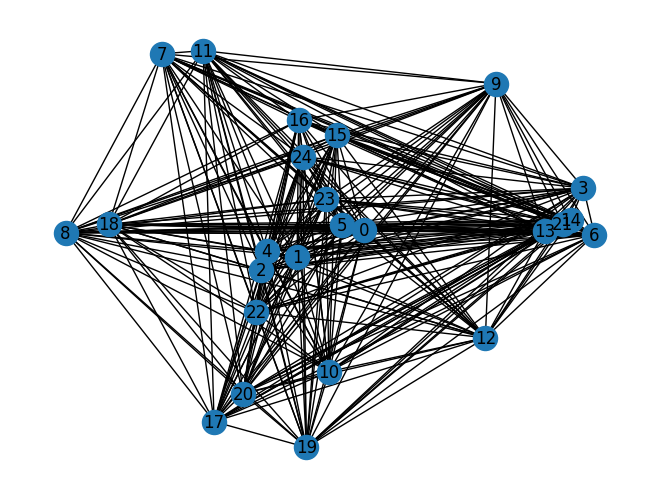

In [7]:
challenge_graph, euclidean_distance_Edge_11_12 = testcase_tsp("https://d3c33hcgiwev3.cloudfront.net/_f702b2a7b43c0d64707f7ab1b4394754_tsp.txt?Expires=1716422400&Signature=LwyIBXSu5Wb9-IXmK54Frc9008rG0xPjhfR1icMMAQn1XujxG-g5snWS9msUzKBCjpBF54VlYa9ZuTnrKh49MggaJ4RheyedqAIRLXBT9DB9WjldORlVwStCyO302Rfmr7CtOFuLBu5DKVmkg8sFejpHUPTcPlw9CNSzCrzvhTo_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A")
nx.draw(challenge_graph, with_labels = True)

#### Let us first draw only the nodes with no edges

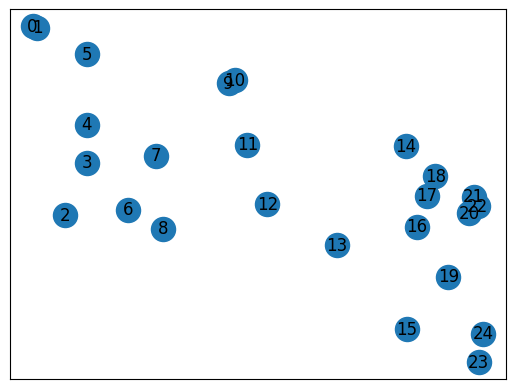

In [8]:
pos = nx.get_node_attributes(challenge_graph, 'pos')
nx.draw_networkx_labels(challenge_graph,pos=pos)
nx.draw_networkx_nodes(challenge_graph, pos=pos)

### Conclusion : 2 distinct clusters groups 1 (nodes 0 to 12) and group 2 (nodes 13 to 24)

Create 2 graphs: Its is important to keep node 11 and 12 in both the graphs

In [9]:
import copy

subproblem_1 = challenge_graph.copy(as_view=False)
subproblem_2 = challenge_graph.copy(as_view=False)
# subproblem 1 graph has nodes 0 to 12, hence remove nodes 13 to 24
for i in range(13,25):
    subproblem_1.remove_node(i)
# subproblem 2 graph has nodes 11 to 24, hence remove nodes 0 to 10
for i in range(0,11):
    subproblem_2.remove_node(i)


In [10]:
output1 = TravelingSalesmanProblem(subproblem_1, 11)
output2 = TravelingSalesmanProblem(subproblem_2, 11)
print("Output 1 : {}".format(output1))
print("Output 2 : {}".format(output2))

A : 
[[ 3986.26114911            inf            inf ...            inf
             inf            inf]
 [           inf  3913.82877684            inf ...            inf
             inf            inf]
 [           inf            inf  2995.64492463 ...            inf
             inf            inf]
 ...
 [12741.5772706             inf 13702.28717526 ... 13309.77199053
  13248.43781269 13346.15250186]
 [           inf 12668.65554663 13576.04808205 ... 13183.53289732
  13122.19871947 13219.91340865]
 [12743.19116078 12816.11288475 13703.90106545 ... 13311.38588072
  13250.05170287 13347.76639205]]
Shortest Traveling Salesman Problem solution for node 11: 14662.004640787902
A : 
[[ 1314.23824874            inf            inf ...            inf
             inf            inf]
 [           inf  2510.05785721            inf ...            inf
             inf            inf]
 [           inf            inf  2250.24689954 ...            inf
             inf            inf]
 ...
 [13049.983

In [11]:
print("Edge 11-12 {}".format(euclidean_distance_Edge_11_12))

Edge 11-12 1314.2382487374398


In [12]:
# This edge 11-12 is useless and hence remove it from output of both the sub-graphs
print("Shortest Traveling Salesman Problem solution for the 2 subproblems combined : {}".format(output1+output2 - (2* euclidean_distance_Edge_11_12)))

Shortest Traveling Salesman Problem solution for the 2 subproblems combined : 26442.730308954753


Answer is 26442.73

Adding more detail as to how I came up with this solution:

I browsed through the discussion forum (always very useful).
There is a post - TSP-Hint in which GongPing had elaborated 2 graphs, one showing nodes 0 to 11-12 connected, and another showing 11 to 12 to 24 path. Now to connect these 2 paths to form a resulting path, we need to delete the edge 11-12 twice from the summed outputs of subgraph1 and subgraph2.